# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas
import pandas as pd
import numpy as np
import re
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:
fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:
display(fifa.head())

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
# Your code here:
def str_to_float(strg):
    if strg.endswith('M'):
        string = re.findall(r"[-+]?\d*\.\d+|\d+", strg)[0]
        floated = float(string)
        return floated*1000000
    elif strg.endswith('K'):
        string = re.findall(r"[-+]?\d*\.\d+|\d+", strg)[0]
        floated = float(string)
        return floated*1000
    else:
        string = re.findall(r"[-+]?\d*\.\d+|\d+", strg)[0]
        floated = float(string)
        return floated


fifa['valuenum'] = fifa['Value'].apply(str_to_float)
fifa_value = fifa.rename(columns={"Preferred Foot":"foot"})
display(fifa_value.head())

,Name,Age,Nationality,Overall,Potential,Club,Value,foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,valuenum
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110500000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77000000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118500000.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72000000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102000000.0


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [5]:
# Your code here:
model_foot = ols('valuenum ~ C(foot)', data=fifa_value).fit()
anova_foot = sm.stats.anova_lm(model_foot, typ=2)
display(anova_foot)
model_Position = ols('valuenum ~ C(Position)', data=fifa_value).fit()
anova_Position = sm.stats.anova_lm(model_Position, typ=2)
display(anova_Position)

,sum_sq,df,F,PR(>F)
C(foot),1.609973e+14,1.0,5.132594,0.023492
Residual,5.695422e+17,18157.0,NaN,NaN


,sum_sq,df,F,PR(>F)
C(Position),1.649609e+16,26.0,20.784194,5.517758e-96
Residual,5.531370e+17,18120.0,NaN,NaN


What is your conclusion from this ANOVA?

In [ ]:
# Your conclusions here:
En ambos casos se puede rechazar la hipótesis nula lo que implica que existe una diferencia en el valor de un
jugador según si es zurdo o diestro o según la posición que juegue. No obstante, para el caso de la posición 
que juega dicha afirmación es indiscutible al ser el valor de p-value casi cero.

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [6]:
# Your code here:
model_nat = ols('valuenum ~ C(Nationality)', data=fifa_value).fit()
anova_nat = sm.stats.anova_lm(model_nat, typ=2)
display(anova_nat)

,sum_sq,df,F,PR(>F)
C(Nationality),3.281224e+16,163.0,6.762478,4.840477e-134
Residual,5.370951e+17,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

In [ ]:
# Your conclusions here:
En este caso se puede rechazar sin lugar a duda la hipótesis nula, lo que significa que existe una clara 
variación en el precio de un jugador dependiendo de su nacionalidad.

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [7]:
# Your code here:
fifa_notnan = fifa_value.dropna()
display(fifa_notnan.head())
print(len(fifa_notnan))#No se han eliminado filas.

,Name,Age,Nationality,Overall,Potential,Club,Value,foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,valuenum
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110500000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77000000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118500000.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72000000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102000000.0


17918


Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [8]:
# Your code here:
X = sm.add_constant(fifa_notnan[['Stamina', 'SprintSpeed']]) 
Y = fifa_notnan.valuenum
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               valuenum   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     453.4
Date:                Sun, 24 Feb 2019   Prob (F-statistic):          8.04e-193
Time:                        23:18:11   Log-Likelihood:            -3.0350e+05
No. Observations:               17918   AIC:                         6.070e+05
Df Residuals:                   17915   BIC:                         6.070e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -3.07e+06   1.97e+05    -15.600      

In [9]:
#Ahora value a partir de stamina.
X = sm.add_constant(fifa_notnan.Stamina) 
Y = fifa_notnan.valuenum
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               valuenum   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 24 Feb 2019   Prob (F-statistic):          1.42e-182
Time:                        23:18:14   Log-Likelihood:            -3.0353e+05
No. Observations:               17918   AIC:                         6.071e+05
Df Residuals:                   17916   BIC:                         6.071e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.318e+06   1.69e+05    -13.748      0.0

In [10]:
#Ahora value a partir de velocidad de sprint.
X = sm.add_constant(fifa_notnan.SprintSpeed) 
Y = fifa_notnan.valuenum
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               valuenum   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     559.7
Date:                Sun, 24 Feb 2019   Prob (F-statistic):          7.28e-122
Time:                        23:18:17   Log-Likelihood:            -3.0366e+05
No. Observations:               17918   AIC:                         6.073e+05
Df Residuals:                   17916   BIC:                         6.073e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.877e+06   1.87e+05    -10.012      

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [ ]:
# Your conclusions here:
El valor de R2 está bastante alejado de 1 lo que implica que el ajuste lineal de los datos de valor de jugador
respecto a aspectos como la stamina y la velicidad de sprint no es el más adecuado. También, se puede ver que 
el ajuste mejora si se hace una regresión combinada de los dos atributos que teniendo en cuenta cada uno por 
separado.

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [11]:
# Your code here:
X = sm.add_constant(fifa_notnan.Potential) 
Y = fifa_notnan.valuenum
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               valuenum   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9058.
Date:                Sun, 24 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:18:22   Log-Likelihood:            -3.0027e+05
No. Observations:               17918   AIC:                         6.006e+05
Df Residuals:                   17916   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.544e+07      4e+05    -88.693      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [ ]:
# Your conclusions here:
En este caso al igual que en los anteriores, el valor de R2 habla de que la regresión lineal no es la más 
apropiada para las variables relacionadas.

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Text(0, 0.5, 'Valor Jugador (Millones)')

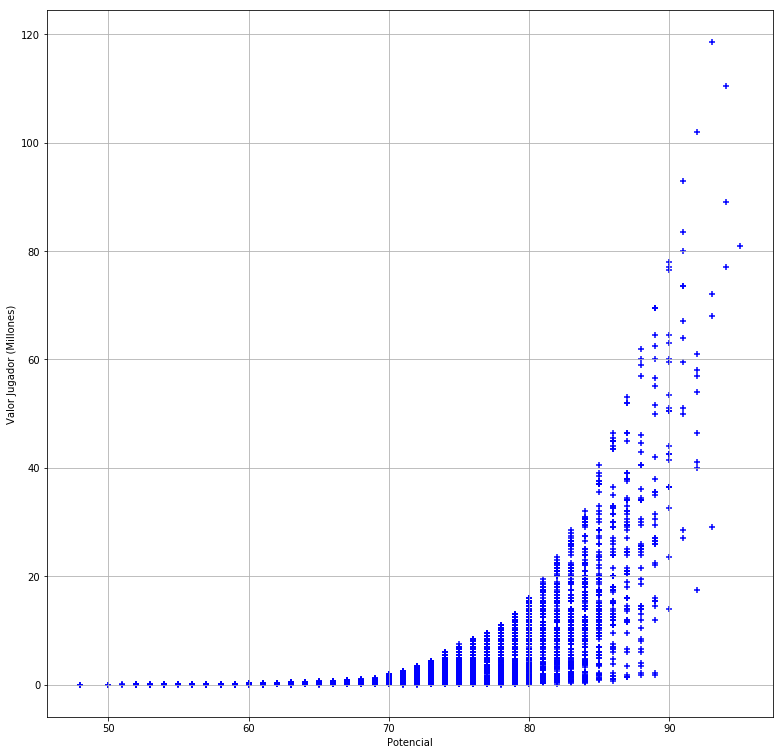

In [12]:
# Your code here:
def plot_scale(value):
    return value/1000000

fifa_notnan['plot'] = fifa_notnan['valuenum'].apply(plot_scale)
plt.figure(figsize=(13,13))
plt.grid(True)
plt.scatter(fifa_notnan['Potential'],fifa_notnan['plot'],c='b', marker='+')
plt.xlabel('Potencial')
plt.ylabel('Valor Jugador (Millones)')

No se observa una relación lineal entre los datos.